# Numerical Methods in Physics and Astrophysics (2024/25) - Exercises

## Name: Andres Guarin
## Enrollment Number: 6748917

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem I

We will consider specifically the following function:
\begin{equation}
    f(x) = e^{\sqrt{5}x}-13.5\cos(0.1x)+25x^4
\end{equation}

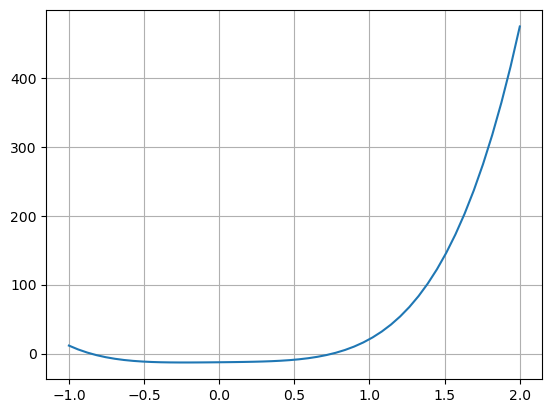

In [2]:
f = lambda x : np.exp(np.sqrt(5)*x) - 13.5*np.cos(0.1*x) + 25*x**4
x = np.linspace(-1, 2)
plt.plot(x, f(x))
plt.grid()
plt.show()

### 1. Find this root again, using **linear interpolation**.

*Solution:*

We implement the linear interpolation algorithm in the following function:

In [3]:
def linear_interpolation(f, x1, x2, e):
    """
    Linear interpolation algorithm for root finding, assuming the root is in the interval (x1, x2).

    Parameters:
    f: function whose roots we want to find.
    x1: first endpoint of the interval used in the linear interpolation algorithm.
    x2: second endpoint of the interval used in the linear interpolation algorithm.
    e: tolerance in f(x).

    Returns:
    float
        the value obtained for the root of f.
    """
    n = 1
    while True:
        f1 = f(x1)
        f2 = f(x2)
        x3 = x2 - f2*(x2-x1)/(f2-f1)
        f3 = f(x3)
        if f3*f1 < 0:
            estim_error = abs(x2-x1)
            x2 = x3
        else:
            x1 = x3
        print(f'Iter {n}, x={x3}, f(x)={f3}')
        if (abs(f3) < e):
            break
        n += 1
    return x3

We apply the algorithm to the specified function, considering initial values $x_1=0$, $x_2=1$, and a tolerance of $10^{-12}$:

In [4]:
linear_interpolation(f, 0, 1, 1e-9)

Iter 1, x=0.3739837427256477, f(x)=-10.693808994189293
Iter 2, x=0.5857162112832606, f(x)=-6.829469339165751
Iter 3, x=0.6876619280272873, f(x)=-3.2240488692420426
Iter 4, x=0.7293628890511948, f(x)=-1.2808041299787396
Iter 5, x=0.7449736770990931, f(x)=-0.47235958019156676
Iter 6, x=0.7506038226106678, f(x)=-0.16934292238400328
Iter 7, x=0.7526060492036459, f(x)=-0.06008983642239407
Iter 8, x=0.7533144870695382, f(x)=-0.02124445359651972
Iter 9, x=0.7535646976013857, f(x)=-0.007501141027564273
Iter 10, x=0.7536530120346085, f(x)=-0.0026473434046216937
Iter 11, x=0.7536841765007141, f(x)=-0.000934163833862911
Iter 12, x=0.7536951729650887, f(x)=-0.00032961810095422095
Iter 13, x=0.7536990529874942, f(x)=-0.00011630283934493946
Iter 14, x=0.7537004220115646, f(x)=-4.10361395903891e-05
Iter 15, x=0.7537009050552546, f(x)=-1.4479100805431244e-05
Iter 16, x=0.7537010754912047, f(x)=-5.108769409289948e-06
Iter 17, x=0.7537011356273808, f(x)=-1.8025647499086972e-06
Iter 18, x=0.7537011568456

0.7537011684061424

This finds the root:
\begin{equation}x=0.7537011684061424\end{equation}

### 2. Implement **Newton's method**.

*Solution:*

We implement Newton's method in the following function:

In [5]:
def newton(f, df, x1, e1, e2, print_output=True):
    """
    Newton's method for root finding.

    Parameters:
    f: function whose roots we want to find.
    df: derivative of f.
    x1: initial estimate of the root.
    e1: tolerance in the difference of two consecutive estimates (estimated error).
    e2: tolerance in f(x).

    Returns:
    float
        the value obtained for the root of f.
    """
    f1 = f(x1)
    df1 = df(x1)
    if (f1 != 0) and (df1 != 0):
        n = 1
        while True:
            x2 = x1
            f2 = f1
            x1 = x1 - f1/df1
            f1 = f(x1)
            df1 = df(x1)
            estim_err = abs(x2 - x1)
            if print_output:
                print(f'Iter {n}, x={x1}, f(x)={f1}, estimated_error={estim_err}')
            if (estim_err < e1) or (abs(f2) < e2):
                break
            n += 1
    return x1

The derivative of $f(x) = e^{\sqrt{5}x}-13.5\cos(0.1x)+25x^4$ is
\begin{equation}
    f'(x) = \sqrt{5}e^{\sqrt{5}x} + 1.35\sin(0.1x) + 100x^3
\end{equation}

In [6]:
df = lambda x : np.sqrt(5)*np.exp(np.sqrt(5)*x) + 1.35*np.sin(0.1*x) + 100*x**3

We apply the algorithm to the specified function, considering initial value $x_1=1$, and tolerances of $10^{-12}$:

In [7]:
newton(f, df, 0, 1e-9, 1e-9)

Iter 1, x=5.590169943749474, f(x)=292739.9040332564, estimated_error=5.590169943749474
Iter 2, x=5.116089862498731, f(x)=110075.6898280736, estimated_error=0.47408008125074286
Iter 3, x=4.618587494403567, f(x)=41924.443763506824, estimated_error=0.497502368095164
Iter 4, x=4.08239281758569, f(x)=16145.703566503737, estimated_error=0.5361946768178765
Iter 5, x=3.493304298947067, f(x)=6178.505294930895, estimated_error=0.5890885186386234
Iter 6, x=2.8617221520103433, f(x)=2264.974472357501, estimated_error=0.6315821469367235
Iter 7, x=2.2476422601329893, f(x)=777.1851906603354, estimated_error=0.614079891877354
Iter 8, x=1.7212185783857166, f(x)=253.05838224460678, estimated_error=0.5264236817472727
Iter 9, x=1.309813745297522, f(x)=78.90453587274006, estimated_error=0.41140483308819453
Iter 10, x=1.013977507951039, f(x)=22.650191338903568, estimated_error=0.2958362373464831
Iter 11, x=0.8341780056713853, f(x)=5.109961449013883, estimated_error=0.17979950227965358
Iter 12, x=0.7637918354

0.7537011684140182

This finds the root:
\begin{equation}x=0.7537011684140182\end{equation}

### 3. Examine the convergence of the two methods.

*Solution:*

First, we note that with the specified initial guesses, both methods converge to the same root, and give the same numerical value for it up to the specified tolerance.

\begin{align}
    x_{LinearInterp} &= 0.7537011684061424 \\
    x_{Newton} &= 0.7537011684140182
\end{align}

We also note that, as expected, Newthon's method converges faster (16 iterations) compared to the linear interpolation method (25 iterations), even considering that in this case Newthon's method finds a poor estimate on the first iteration ($x = 5.590169943749474$) compared to the linear interpolation method ($x=0.3739837427256477$).

### 4. Explore the robustness of the methods with varying initial guesses and tolerances. What happens when you specify a tolerance below machine precision?

*Solution:*

Using a different initial guesses $x_2 = 2$ for the linear interpolation mehtod we find:

In [8]:
linear_interpolation(f, 0, 2, 1e-9)

Iter 1, x=0.05135446226866991, f(x)=-12.377963047096442
Iter 2, x=0.10091421052028848, f(x)=-12.243581638106665
Iter 3, x=0.14870234296226492, f(x)=-12.091821682156388
Iter 4, x=0.1947248697384658, f(x)=-11.915887630694222
Iter 5, x=0.23896632316556898, f(x)=-11.708291219566002
Iter 6, x=0.2813897969892818, f(x)=-11.461796327307013
Iter 7, x=0.32194022473525163, f(x)=-11.17025758748534
Iter 8, x=0.36054994929427964, f(x)=-10.829336537676488
Iter 9, x=0.39714574631544197, f(x)=-10.437054263106248
Iter 10, x=0.4316565008937976, f(x)=-9.994130437582344
Iter 11, x=0.464020761131966, f(x)=-9.504068091977585
Iter 12, x=0.49419345220427724, f(x)=-8.972969382553918
Iter 13, x=0.5221511578002522, f(x)=-8.409103464605398
Iter 14, x=0.5478955636935441, f(x)=-7.822283618843262
Iter 15, x=0.5714548887063795, f(x)=-7.2231372488871175
Iter 16, x=0.5928833649631735, f(x)=-6.622362579940467
Iter 17, x=0.612259033213332, f(x)=-6.030058257670743
Iter 18, x=0.6296802605278049, f(x)=-5.45519009718749
Iter 

0.7537011683979684

This shows a slower convergence compared to the previous choice of initial guesses, needing now 165 iterations. This suggests that an appropriate choice of initial guesses for the linear interpolaton method can greatly improve the convergence speed of the algorithm.

For Newton's method, using a different initial guesses $x_1 = -0.2$ we find:

In [9]:
newton(f, df, -0.2, 1e-9, 1e-9)

Iter 1, x=21.06533299040006, f(x)=2.8628415350640778e+20, estimated_error=21.265332990400058
Iter 2, x=20.618119394900095, f(x)=1.0531805440817793e+20, estimated_error=0.44721359549996365
Iter 3, x=20.17090579940012, f(x)=3.874434700094514e+19, estimated_error=0.4472135954999743
Iter 4, x=19.723692203900118, f(x)=1.425324872326099e+19, estimated_error=0.4472135955000027
Iter 5, x=19.27647860840005, f(x)=5.243477175191584e+18, estimated_error=0.4472135955000667
Iter 6, x=18.829265012899825, f(x)=1.928967453005414e+18, estimated_error=0.44721359550022655
Iter 7, x=18.382051417399207, f(x)=7.096274686501816e+17, estimated_error=0.44721359550061734
Iter 8, x=17.934837821897627, f(x)=2.6105735660752454e+17, estimated_error=0.44721359550158013
Iter 9, x=17.48762422639368, f(x)=9.603763446300021e+16, estimated_error=0.44721359550394624
Iter 10, x=17.040410630883947, f(x)=3.533027129815114e+16, estimated_error=0.4472135955097336
Iter 11, x=16.59319703536011, f(x)=1.2997280462025024e+16, estima

0.7537011684140182

This also shows an increase in the number of iterations needed (now 50), and the importance of the initial guess. Moreover, for $x_1 = -0.25$ we find:

In [10]:
newton(f, df, -0.25, 1e-9, 1e-9)

Iter 1, x=-40.61897526083729, f(x)=68054353.39691636, estimated_error=40.36897526083729
Iter 2, x=-30.464228597906587, f(x)=21532825.555348348, estimated_error=10.154746662930702
Iter 3, x=-22.848167040719918, f(x)=6813119.917207659, estimated_error=7.6160615571866686
Iter 4, x=-17.13612275432533, f(x)=2155711.5767904464, estimated_error=5.712044286394587
Iter 5, x=-12.852099623591126, f(x)=682077.8093348879, estimated_error=4.284023130734205
Iter 6, x=-9.63911223808265, f(x)=215810.54630023538, estimated_error=3.2129873855084767
Iter 7, x=-7.229449982716808, f(x)=68280.49414248523, estimated_error=2.4096622553658413
Iter 8, x=-5.422398118043635, f(x)=21600.96664291242, estimated_error=1.8070518646731735
Iter 9, x=-4.067583084341336, f(x)=6831.2192726799185, estimated_error=1.354815033702299
Iter 10, x=-3.052610109494376, f(x)=2157.952943761666, estimated_error=1.0149729748469598
Iter 11, x=-2.2940912468147134, f(x)=679.3005818393524, estimated_error=0.7585188626796624
Iter 12, x=-1.73

-0.8540824153433314

That is, we now get to a different root at $x = -0.8540824153433314$.

Now, asking for a smaller tolerance of $10^{-12}$ should make the number of required iterations to increase in both methods:

In [11]:
linear_interpolation(f, 0, 1, 1e-12)

Iter 1, x=0.3739837427256477, f(x)=-10.693808994189293
Iter 2, x=0.5857162112832606, f(x)=-6.829469339165751
Iter 3, x=0.6876619280272873, f(x)=-3.2240488692420426
Iter 4, x=0.7293628890511948, f(x)=-1.2808041299787396
Iter 5, x=0.7449736770990931, f(x)=-0.47235958019156676
Iter 6, x=0.7506038226106678, f(x)=-0.16934292238400328
Iter 7, x=0.7526060492036459, f(x)=-0.06008983642239407
Iter 8, x=0.7533144870695382, f(x)=-0.02124445359651972
Iter 9, x=0.7535646976013857, f(x)=-0.007501141027564273
Iter 10, x=0.7536530120346085, f(x)=-0.0026473434046216937
Iter 11, x=0.7536841765007141, f(x)=-0.000934163833862911
Iter 12, x=0.7536951729650887, f(x)=-0.00032961810095422095
Iter 13, x=0.7536990529874942, f(x)=-0.00011630283934493946
Iter 14, x=0.7537004220115646, f(x)=-4.10361395903891e-05
Iter 15, x=0.7537009050552546, f(x)=-1.4479100805431244e-05
Iter 16, x=0.7537010754912047, f(x)=-5.108769409289948e-06
Iter 17, x=0.7537011356273808, f(x)=-1.8025647499086972e-06
Iter 18, x=0.7537011568456

0.753701168414003

In [12]:
newton(f, df, 0, 1e-12, 1e-12)

Iter 1, x=5.590169943749474, f(x)=292739.9040332564, estimated_error=5.590169943749474
Iter 2, x=5.116089862498731, f(x)=110075.6898280736, estimated_error=0.47408008125074286
Iter 3, x=4.618587494403567, f(x)=41924.443763506824, estimated_error=0.497502368095164
Iter 4, x=4.08239281758569, f(x)=16145.703566503737, estimated_error=0.5361946768178765
Iter 5, x=3.493304298947067, f(x)=6178.505294930895, estimated_error=0.5890885186386234
Iter 6, x=2.8617221520103433, f(x)=2264.974472357501, estimated_error=0.6315821469367235
Iter 7, x=2.2476422601329893, f(x)=777.1851906603354, estimated_error=0.614079891877354
Iter 8, x=1.7212185783857166, f(x)=253.05838224460678, estimated_error=0.5264236817472727
Iter 9, x=1.309813745297522, f(x)=78.90453587274006, estimated_error=0.41140483308819453
Iter 10, x=1.013977507951039, f(x)=22.650191338903568, estimated_error=0.2958362373464831
Iter 11, x=0.8341780056713853, f(x)=5.109961449013883, estimated_error=0.17979950227965358
Iter 12, x=0.7637918354

0.7537011684140182

We see that the increase in the number of iterations is more notorious for the linear interpolation algorithm, percieving here the faster convergence of the Newton's method.

When trying to set for the tolerance a value smaller than the machine's precision, we get an infinite loop in the linear interpolation algorithm:

In [13]:
# Try at your own risk
# linear_interpolation(f, 0, 1, 1e-18)

For the Newton's method, the algorithm finishes without problem:

In [14]:
newton(f, df, 0, 1e-50, 1e-323)

Iter 1, x=5.590169943749474, f(x)=292739.9040332564, estimated_error=5.590169943749474
Iter 2, x=5.116089862498731, f(x)=110075.6898280736, estimated_error=0.47408008125074286
Iter 3, x=4.618587494403567, f(x)=41924.443763506824, estimated_error=0.497502368095164
Iter 4, x=4.08239281758569, f(x)=16145.703566503737, estimated_error=0.5361946768178765
Iter 5, x=3.493304298947067, f(x)=6178.505294930895, estimated_error=0.5890885186386234
Iter 6, x=2.8617221520103433, f(x)=2264.974472357501, estimated_error=0.6315821469367235
Iter 7, x=2.2476422601329893, f(x)=777.1851906603354, estimated_error=0.614079891877354
Iter 8, x=1.7212185783857166, f(x)=253.05838224460678, estimated_error=0.5264236817472727
Iter 9, x=1.309813745297522, f(x)=78.90453587274006, estimated_error=0.41140483308819453
Iter 10, x=1.013977507951039, f(x)=22.650191338903568, estimated_error=0.2958362373464831
Iter 11, x=0.8341780056713853, f(x)=5.109961449013883, estimated_error=0.17979950227965358
Iter 12, x=0.7637918354

0.7537011684140182

That the linear interpolation algorithm loops infinitely while the Newton's method halts may be explained by the different conditions imposed on the code for breaking out of the loop.

- Linear interpolation: UNTIL $|f(x_3)|<\mathcal{E}$
- Newton's method: UNTIL $(|x_1-x_2| < \mathcal{E})$ OR $(f(x_2)<\mathcal{E}')$

Having the extra condition on the Newton's method $(|x_1-x_2| < \mathcal{E})$ makes it halt when the machine's precision is reached, since then $|x_1-x_2| = 0$.

## Problem II

Find the eigenvalues $\lambda$ of the differential equation $y'' + \lambda^2 y = 0$ with the following boundary conditions $y(0) = 0$ and $y(1) = y'(1)$.

*Solution:*

The differential equation considered is the wave equation. Hence, assuming $\lambda^2 > 0$, we propose solutions of the form
\begin{equation}
    y(x) = A\cos(\lambda x) + B\sin(\lambda x), \qquad A, B \in \mathbb{R}.
\end{equation}

Imposing the first boundary condition $y(0)=0$ we obtain:
\begin{equation}
    A = 0.
\end{equation}

Then
\begin{equation}
    y(x) = B\sin(\lambda x).
\end{equation}

Moreover, $y'(x) = B\lambda\cos(\lambda x)$, and using the second boundary condition $y(1) = y'(1)$ we obtain:
\begin{equation}
    B\sin(\lambda) = B\lambda\cos(\lambda),
\end{equation}
so the eigenvalues $\lambda$ must satisfy the equation
\begin{equation}
    \sin(\lambda) - \lambda\cos(\lambda) = 0.
\end{equation}

We will use Newton's method to find the eigenvalues numerically, as the roots of the function
\begin{equation}
    g(x) = \sin(\lambda) - \lambda\cos(\lambda).
\end{equation}

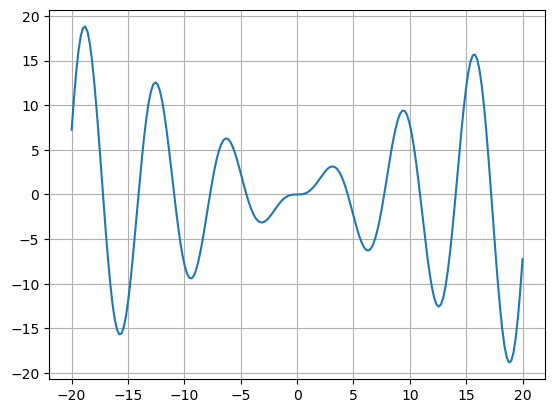

In [15]:
g = lambda x : np.sin(x) - x*np.cos(x)
x = np.linspace(-20, 20, num=200)
plt.plot(x, g(x))
plt.grid()
plt.show()

Since $g$ is an odd function, if $\lambda_n$ is a root then $-\lambda_n$ is also a root. Reasonable initial guesses are given by
\begin{equation}
    \lambda_{1,n} = \left(n + \frac{1}{2}\right)\pi,
\end{equation}
since those are the points at which $\lambda\cos(\lambda)=0$.

In Newton's method we will also need the derivative
\begin{equation}
    g'(\lambda) = \lambda\sin(\lambda).
\end{equation}

In [16]:
dg = lambda x : x * np.sin(x)

We then write a function to print the first $n$ roots of $g$, which correspond to the first $n$ eigenvalues of the differential equation with the specified boundary conditions:

In [17]:
def find_eigenvalues(n, e1, e2):
    for i in range(n):
        x1 = (i + 0.5)*np.pi
        x = newton(g, dg, x1, e1, e2, print_output=False)
        print(f"lambda_{i} = ±{x}")

and use it to find the first 10 eigenvalues, with a tolerance of $10^{-9}$:

In [18]:
find_eigenvalues(10, 1e-9, 1e-9)

lambda_0 = ±0.0008979445461104295
lambda_1 = ±4.493409457909064
lambda_2 = ±7.725251836937707
lambda_3 = ±10.904121659428899
lambda_4 = ±14.066193912831473
lambda_5 = ±17.22075527193077
lambda_6 = ±20.37130295928756
lambda_7 = ±23.519452498689006
lambda_8 = ±26.666054258812675
lambda_9 = ±29.81159879089296


## Problem III

We first consider the following nonlinear system of equations
\begin{align}
    f_1(x,y) &= xy - 0.1 \\
    f_2(x,y) &= x^2 + 3y^2 - 2
\end{align}

### A1. Solve the nonlinear system of equations using the generalized Newton method. Make sure you find all solutions (there are 4!). Under what conditions would the solver create problems? What checks can you put on/in your solver to avoid diverging from the solution or continuing through with NaNs?

*Solution:*

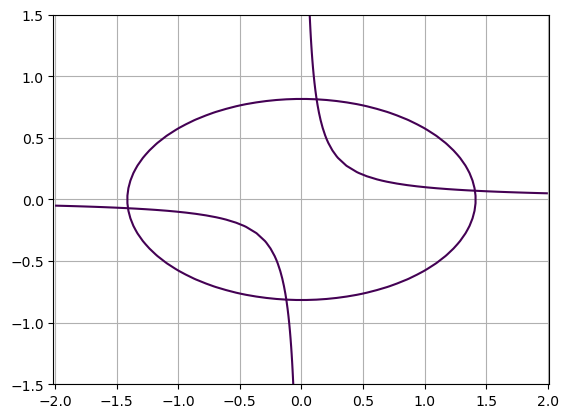

In [19]:
F = lambda p : np.array([p[0] * p[1] - 0.1,
                         p[0]**2 + 3*p[1]**2 - 2])

X, Y = np.meshgrid(np.linspace(-2,2), np.linspace(-1.5,1.5))
Z = F(np.array([X, Y]))
plt.contour(X, Y, Z[0], levels=[0])
plt.contour(X, Y, Z[1], levels=[0])
plt.grid()
plt.axis('equal')
plt.show()

Before using the generalized Newton's method, we have to find first the Jacobian matrix $J$ of $f = (f_1, f_2)$:
\begin{equation}
    J(x, y) = \begin{pmatrix}
        y & x \\
        2x & 6y
    \end{pmatrix},
\end{equation}
and its inverse:
\begin{equation}
    J^{-1}(x, y) = \frac{1}{6y^2-2x^2}\begin{pmatrix}
        6y & -x \\
        -2x & y
    \end{pmatrix}.
\end{equation}

In [20]:
def Jinv(p):
    """
    Parameters:
    p: 2-dimensional point. p[0] corresponds to coordinate x and p[1] to y.
    """
    det = 6*p[1]**2 - 2*p[0]**2
    return np.array([[6*p[1], -p[0]], [-2*p[0],  p[1]]]) / det

In [21]:
def generalized_newton(f, dfinv, p1, e1, e2, print_output=True):
    """
    Generalized Newton's method for root finding.

    Parameters:
    f: function whose roots we want to find.
    dfinv: inverse of the Jacobian matrix of f.
    p1: initial estimate of the root.
    e1: tolerance in the difference of two consecutive estimates (estimated error).
    e2: tolerance in f(x).

    Returns:
    np.array
        the value obtained for the root of f.
    """
    f1 = f(p1)
    Jinv1 = dfinv(p1)
    if (f1 != 0).any() and np.isfinite(Jinv1).all():
        n = 1
        while True:
            p2 = p1
            f2 = f1
            p1 = p1 - Jinv1@f1
            f1 = f(p1)
            Jinv1 = dfinv(p1)
            if not np.isfinite(Jinv1).all():
                print("Jacobian matrix at point {p1} is not suitable for Newton's method.")
                break
            estim_err = np.max(np.abs(p2 - p1))
            if print_output:
                print(f"(Iter {n})")
                print(f"\t p={p1}")
                print(f"\t |f(p)|={np.linalg.norm(f1)}")
                print(f"\t estimated_error={estim_err}")
            if (estim_err < e1) or (np.linalg.norm(f2) < e2):
                break
            n += 1
    return p1

In [22]:
generalized_newton(F, Jinv, np.array([1, 0]), 1e-9, 1e-9)

(Iter 1)
	 p=[1.5 0.1]
	 |f(p)|=0.28442925306655764
	 estimated_error=0.5
(Iter 2)
	 p=[1.41216216 0.07252252]
	 |f(p)|=0.010268207399871622
	 estimated_error=0.08783783783783772
(Iter 3)
	 p=[1.40886563 0.07098269]
	 |f(p)|=1.8683167470822763e-05
	 estimated_error=0.0032965361025971696
(Iter 4)
	 p=[1.40885974 0.07097939]
	 |f(p)|=7.014223778729044e-11
	 estimated_error=5.8813576320204675e-06
(Iter 5)
	 p=[1.40885974 0.07097939]
	 |f(p)|=4.440892098500626e-16
	 estimated_error=2.1998403099132702e-11


array([1.40885974, 0.07097939])

We find the first root at
\begin{equation}
    r_1 = \begin{pmatrix} 1.40885974 \\ 0.07097939 \end{pmatrix}
\end{equation}

In [23]:
generalized_newton(F, Jinv, np.array([0, 1]), 1e-9, 1e-9)

(Iter 1)
	 p=[0.1        0.83333333]
	 |f(p)|=0.09480975102218588
	 estimated_error=0.16666666666666663
(Iter 2)
	 p=[0.12234727 0.81377278]
	 |f(p)|=0.0017042592086190236
	 estimated_error=0.02234726688102892
(Iter 3)
	 p=[0.12293961 0.81340572]
	 |f(p)|=7.857365196026019e-07
	 estimated_error=0.0005923434947515405
(Iter 4)
	 p=[0.1229399  0.81340555]
	 |f(p)|=1.7888806812711768e-13
	 estimated_error=2.9291185470181613e-07
(Iter 5)
	 p=[0.1229399  0.81340555]
	 |f(p)|=4.443059973708341e-16
	 estimated_error=6.686318165805005e-14


array([0.1229399 , 0.81340555])

We find the second root at
\begin{equation}
    r_2 = \begin{pmatrix} 0.1229399 \\ 0.81340555 \end{pmatrix}
\end{equation}

In [24]:
generalized_newton(F, Jinv, np.array([-1, 0]), 1e-9, 1e-9)

(Iter 1)
	 p=[-1.5 -0.1]
	 |f(p)|=0.28442925306655764
	 estimated_error=0.5
(Iter 2)
	 p=[-1.41216216 -0.07252252]
	 |f(p)|=0.010268207399871622
	 estimated_error=0.08783783783783772
(Iter 3)
	 p=[-1.40886563 -0.07098269]
	 |f(p)|=1.8683167470822763e-05
	 estimated_error=0.0032965361025971696
(Iter 4)
	 p=[-1.40885974 -0.07097939]
	 |f(p)|=7.014223778729044e-11
	 estimated_error=5.8813576320204675e-06
(Iter 5)
	 p=[-1.40885974 -0.07097939]
	 |f(p)|=4.440892098500626e-16
	 estimated_error=2.1998403099132702e-11


array([-1.40885974, -0.07097939])

We find the third root at
\begin{equation}
    r_3 = \begin{pmatrix} -1.40885974 \\ -0.07097939 \end{pmatrix}
\end{equation}

In [25]:
generalized_newton(F, Jinv, np.array([0, -1]), 1e-9, 1e-9)

(Iter 1)
	 p=[-0.1        -0.83333333]
	 |f(p)|=0.09480975102218588
	 estimated_error=0.16666666666666663
(Iter 2)
	 p=[-0.12234727 -0.81377278]
	 |f(p)|=0.0017042592086190236
	 estimated_error=0.02234726688102892
(Iter 3)
	 p=[-0.12293961 -0.81340572]
	 |f(p)|=7.857365196026019e-07
	 estimated_error=0.0005923434947515405
(Iter 4)
	 p=[-0.1229399  -0.81340555]
	 |f(p)|=1.7888806812711768e-13
	 estimated_error=2.9291185470181613e-07
(Iter 5)
	 p=[-0.1229399  -0.81340555]
	 |f(p)|=4.443059973708341e-16
	 estimated_error=6.686318165805005e-14


array([-0.1229399 , -0.81340555])

We find the fourth root at
\begin{equation}
    r_4 = \begin{pmatrix} -0.1229399 \\ -0.81340555 \end{pmatrix}
\end{equation}

The four roots are then
\begin{equation}
    \begin{pmatrix} 1.40885974 \\ 0.07097939 \end{pmatrix},
    \begin{pmatrix} 0.1229399 \\ 0.81340555 \end{pmatrix},
    \begin{pmatrix} -1.40885974 \\ -0.07097939 \end{pmatrix},
    \begin{pmatrix} -0.1229399 \\ -0.81340555 \end{pmatrix}.
\end{equation}

The solver would create problems when the Jacobian matrix is not invertible at one of the guesses, or equivalently, when the Jacobian determinant is zero. For that, we included in the code the check:
```
if not np.isfinite(Jinv1).all():
    print("Jacobian matrix at point {p1} is not suitable for Newton's method.")
    break
```
which searchs for NaNs or infinites in the inverse of the Jacobian matrix. An alternative way to do this would be to check that the Jacobian determinant is non-zero (or not smaller than some threshold). For the function considered here, the Jacobian determinant is $6y^2-2x^2$.

### A2. Reformulate the equations and add a function for the "improved" $x = g(x)$ method to the above program. What are the requirements for convergence? How does this affect solving the above system of equations? How is the relative performance for the various roots? How does the program behave if you guess $(x, y) = (2, 1)$?

*Solution:*

We rewrite the equations in the form
\begin{align}
    x &= \frac{0.1}{y} \\
    y &= \pm\frac{1}{\sqrt{3}}\sqrt{2-x^2},
\end{align}
that is,
\begin{equation}
    \begin{pmatrix} x \\ y \end{pmatrix} = g(x, y) = \begin{pmatrix} g_1(x, y) \\ g_2(x, y) \end{pmatrix} = \begin{pmatrix} \frac{0.1}{y} \\ \pm\frac{1}{\sqrt{3}}\sqrt{2-x^2} \end{pmatrix}.
\end{equation}

In [26]:
g1 = lambda p : 0.1/p[1]
g2p = lambda p : np.sqrt((2-p[0]**2)/3)
g2m = lambda p : -np.sqrt((2-p[0]**2)/3)
gp = [g1, g2p]
gm = [g1, g2m]

For convergence, it is required that the following conditions are satisfied close to the roots:
\begin{align}
    \left| \frac{\partial g_1}{\partial x} \right| + \left| \frac{\partial g_1}{\partial y} \right| &< 1 \\
    \left| \frac{\partial g_2}{\partial x} \right| + \left| \frac{\partial g_2}{\partial y} \right| &< 1,
\end{align}
which in this exercise translate to the conditions
\begin{align}
    \frac{0.1}{y^2} &< 1 \\
    \frac{1}{\sqrt{3}}\frac{|x|}{\sqrt{2-x^2}} &< 1,
\end{align}
that can also be written as
\begin{align}
    |y| &> \sqrt{0.1} = 0.31622776601683794 \\
    |x| &< \sqrt{\frac{3}{2}} = 1.224744871391589.
\end{align}

We see that the roots $(0.1229399, 0.81340555)$ and $(-0.1229399, -0.81340555)$ satisfy those conditions, but the roots $(1.40885974, 0.07097939)$ and $(-1.40885974, -0.07097939)$ don't, so we expect the method to succeed in the former, and have problems in the latter.

We now implement the improved $x=g(x)$ method in a function.

In [27]:
def improved_x_gx(g, p1, e, print_output=True):
    """
    Improved x = g(x) method for root finding.

    Parameters:
    g: list of functions corresponding to the components of g.
    p1: initial estimate of the root, as a numpy array.
    e: tolerance in the difference of two consecutive estimates (estimated error).

    Returns:
    np.array
        the value obtained for the root of f.
    """
    n = len(p1)
    it = 1
    while True:
        p2 = p1.copy()
        for i in range(n):
            p1[i] = g[i](p1)
        estim_err = np.max(np.abs(p2-p1))
        if print_output:
            print(f"Iter {it}: p={p1}, estimated_error={estim_err}")
        if (estim_err < e):
                break
        it += 1
    return p1

In [28]:
improved_x_gx(gp, np.array([1.408, 0.071]), 1e-9)

Iter 1: p=[1.4084507  0.07363562], estimated_error=0.002635620381961995
Iter 2: p=[1.3580384  0.22783891], estimated_error=0.1542032900474768
Iter 3: p=[0.43890659 0.77617889], estimated_error=0.9191318055151367
Iter 4: p=[0.12883628 0.81310131], estimated_error=0.31007031414734787
Iter 5: p=[0.1229859  0.81340323], estimated_error=0.005850374495016644
Iter 6: p=[0.12294025 0.81340554], estimated_error=4.565102807234378e-05
Iter 7: p=[0.12293991 0.81340555], estimated_error=3.476838432575624e-07
Iter 8: p=[0.1229399  0.81340555], estimated_error=2.6474962916411826e-09
Iter 9: p=[0.1229399  0.81340555], estimated_error=2.015976274805098e-11


array([0.1229399 , 0.81340555])

We see that even with an initial guess very close to the root $r_1 = (1.40885974, 0.07097939)$, the method doesn't converge to that root, converging instead to the other one for which the conditions are fulfilled, in this case $r_2 = (0.1229399 , 0.81340555)$

In [29]:
improved_x_gx(gp, np.array([0, 0.75]), 1e-9)

Iter 1: p=[0.13333333 0.81285961], estimated_error=0.13333333333333333
Iter 2: p=[0.12302247 0.81340139], estimated_error=0.010310859175226492
Iter 3: p=[0.12294053 0.81340552], estimated_error=8.194190576721327e-05
Iter 4: p=[0.12293991 0.81340555], estimated_error=6.241752765479003e-07
Iter 5: p=[0.1229399  0.81340555], estimated_error=4.752891719084218e-09
Iter 6: p=[0.1229399  0.81340555], estimated_error=3.6191619146030973e-11


array([0.1229399 , 0.81340555])

As expected, the method converges successfully to $r_2 = (0.1229399, 0.81340555)$

In [30]:
improved_x_gx(gm, np.array([-1.408, -0.071]), 1e-9)

Iter 1: p=[-1.4084507  -0.07363562], estimated_error=0.002635620381961995
Iter 2: p=[-1.3580384  -0.22783891], estimated_error=0.1542032900474768
Iter 3: p=[-0.43890659 -0.77617889], estimated_error=0.9191318055151367
Iter 4: p=[-0.12883628 -0.81310131], estimated_error=0.31007031414734787
Iter 5: p=[-0.1229859  -0.81340323], estimated_error=0.005850374495016644
Iter 6: p=[-0.12294025 -0.81340554], estimated_error=4.565102807234378e-05
Iter 7: p=[-0.12293991 -0.81340555], estimated_error=3.476838432575624e-07
Iter 8: p=[-0.1229399  -0.81340555], estimated_error=2.6474962916411826e-09
Iter 9: p=[-0.1229399  -0.81340555], estimated_error=2.015976274805098e-11


array([-0.1229399 , -0.81340555])

We see that even with an initial guess very close to the root $r_3 = (1.40885974, 0.07097939)$, the method doesn't converge to that root, converging instead to the other one for which the conditions are fulfilled, in this case $r_4 = (-0.1229399 , -0.81340555)$.

In [31]:
improved_x_gx(gm, np.array([0, -0.75]), 1e-9)

Iter 1: p=[-0.13333333 -0.81285961], estimated_error=0.13333333333333333
Iter 2: p=[-0.12302247 -0.81340139], estimated_error=0.010310859175226492
Iter 3: p=[-0.12294053 -0.81340552], estimated_error=8.194190576721327e-05
Iter 4: p=[-0.12293991 -0.81340555], estimated_error=6.241752765479003e-07
Iter 5: p=[-0.1229399  -0.81340555], estimated_error=4.752891719084218e-09
Iter 6: p=[-0.1229399  -0.81340555], estimated_error=3.6191619146030973e-11


array([-0.1229399 , -0.81340555])

As expected, the method converges successfully to $r_4 = (-0.1229399, -0.81340555)$.

For the guess $(x, y) = (2,1)$ we an error due to division by zero on the second iteration:

In [32]:
improved_x_gx(gm, np.array([2, 1]), 1e-9)

Iter 1: p=[0 0], estimated_error=2


/tmp/ipykernel_81003/679357761.py:1: RuntimeWarning: divide by zero encountered in divide
  g1 = lambda p : 0.1/p[1]


OverflowError: cannot convert float infinity to integer